# Classificação de Sistemas

## 1. Linearidade
### Exemplo 1

#### Amplificador Digital:       $y[n] = 10.x[n]$

Vamos avaliar se esse sistema é um sistema linear?

Vamos usar os sinais $\delta[n]$ e $u[n]$ como base para a composição dos sinais de entrada:

In [4]:
from numpy import arange, zeros, sin, exp, pi, abs, angle, logical_and
from matplotlib.pylab import stem, xlabel, ylabel, title, ylim, grid, figure, setp, \
                             subplot, tight_layout, legend

def impulso(n):                        # sinal de tempo discreto 'n', IMPULSO UNITÁRIO
    return (n==0)*1.

def degrau(n):                         # sinal de tempo discreto 'n', DEGRAU UNITÁRIO
    return (n>=0)*1.

def sistema1(x):                       # sistema 1: Amplificador Digital, ganho = 10
    return 10*x

n = arange(-10,10)                     # abscissas: base temporal

Vamos colocar na entrada do sistema as seguintes entradas: 
> $x_1[n]=5.\delta[n]$  
> $x_2[n]=2.u[n]$

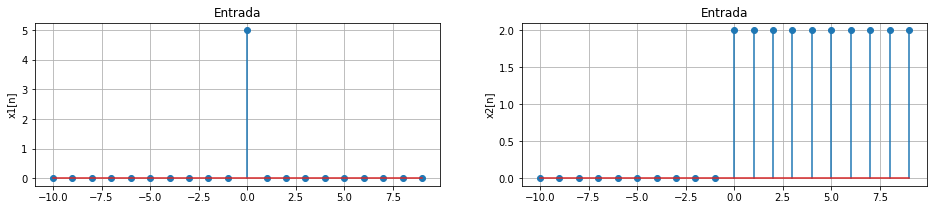

In [5]:
# sinais de entrada
x1 = 5*impulso(n)
x2 = 2*degrau(n)
x  = x1 + x2
# gráficos
figure(figsize=(16,3)) 
subplot(1,2,1); stem(n,x1); ylabel('x1[n]'); grid(True); title('Entrada')
subplot(1,2,2); stem(n,x2); ylabel('x2[n]'); grid(True); title('Entrada');

Logo as respectivas saídas produzidas pelo sistema em análise, serão:
> $y_1[n]=T\{5.\delta[n]\}=50.\delta[n]$  
> $y_2[n]=T\{2.u[n]\}=20.u[n]$

Text(0.5, 1.0, 'Saída')

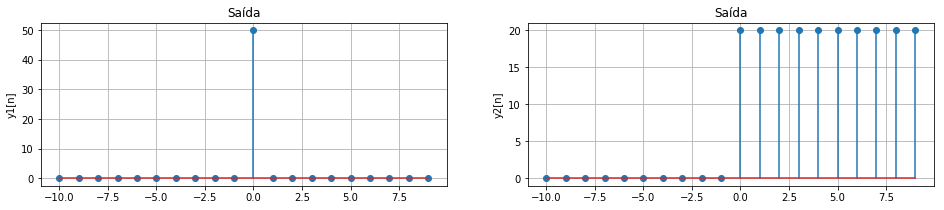

In [6]:
# sinais de saída
y1 = sistema1(x1)
y2 = sistema1(x2)
# gráficos
figure(figsize=(16,3)) 
subplot(1,2,1); stem(n,y1); ylabel('y1[n]'); grid(True); title('Saída')
subplot(1,2,2); stem(n,y2); ylabel('y2[n]'); grid(True); title('Saída')

Agora vamos colocar o sinal composto pela soma de $x_1[n]$ e $x_2[n]$ na entrada do sistema 1 e obter sua saída $y[n]$:

In [7]:
y  = sistema1(x)                       # saída produzida pelo sistema

Vamos admitir que o sistema 1 seja linear, então a saída provocada pela entrada $x_1[n]+x_2[n]$ deveria ser $y_1[n]+y_2[n]$:

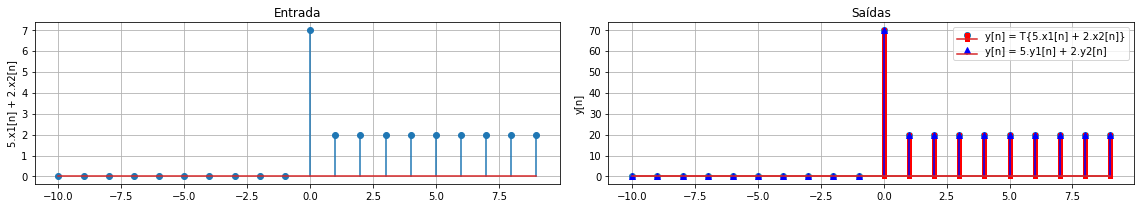

In [8]:
yy = y1 + y2                           # saída considerando o sistema linear
# gráficos
figure(figsize=(16,3)) 
subplot(1,2,1); stem(n,x);  ylabel('5.x1[n] + 2.x2[n]'); grid(True); title('Entrada')
subplot(1,2,2); 
markerline, stemlines, baseline = stem(n,yy,label='y[n] = T{5.x1[n] + 2.x2[n]}')
setp(stemlines,linewidth=5,color='r')
stem(n,y,label='y[n] = 5.y1[n] + 2.y2[n]',linefmt='blue',markerfmt='b^'); grid(True); 
ylabel('y[n]'); title('Saídas'); legend(); tight_layout()

Por serem iguais as saídas, podemos concluir que o sistema **Amplificador Digital** trata-se de um sistema LINEAR!

### Exemplo 2

#### Potenciador:       $y[n] = (x[n])^2$
Obs.: Potenciador é uma palavra derivada de potenciar. Significado de potenciar: [Matemática] Elevar um número a uma potência qualquer.

Vamos avaliar se esse sistema é um sistema linear?

Vamos repetir a mesma análise realizada para o sistema Amplificador Digital. 

Usaremos os sinais $\delta[n]$ e $u[n]$ como base para a composição dos sinais de entrada, de modo que colocaremos na entrada do sistema as seguintes entradas: 
> $x_1[n]=5.\delta[n]$  
> $x_2[n]=2.u[n]$

Logo as respectivas saídas produzidas pelo sistema em análise, serão:
> $y_1[n]=T\{5.\delta[n]\}=(5.\delta[n])^2=25.(\delta[n])^2=25.\delta[n]$  
> $y_2[n]=T\{2.u[n]\}=(2.u[n])^2=4.(u[n])^2=4.u[n]$

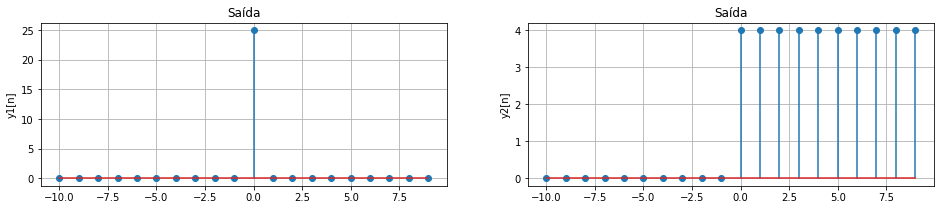

In [9]:
# sinais de saída
def sistema2(x):                       # sistema 2: potenciador
    return x*x                         # ou:  x**2

y1 = sistema2(x1)
y2 = sistema2(x2)
# gráficos
figure(figsize=(16,3)) 
subplot(1,2,1); stem(n,y1); ylabel('y1[n]'); grid(True); title('Saída')
subplot(1,2,2); stem(n,y2); ylabel('y2[n]'); grid(True); title('Saída');

Agora vamos colocar o sinal composto pela soma de $x_1[n]$ e $x_2[n]$ na entrada do sistema 2 e obter sua saída $y[n]$:

In [10]:
x = x1 + x2
y  = sistema2(x)                       # saída produzida pelo sistema

Admitindo que o sistema 2 seja linear, então a saída provocada pela entrada $x_1[n]+x_2[n]$ deveria ser $y_1[n]+y_2[n]$:

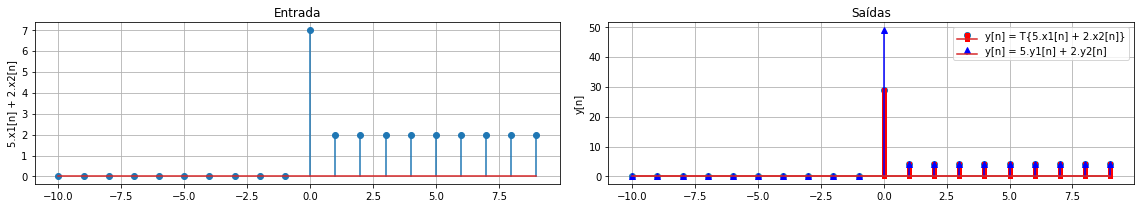

In [11]:
yy = y1 + y2                           # saída considerando o sistema linear
# gráficos
figure(figsize=(16,3)) 
subplot(1,2,1); stem(n,x);  ylabel('5.x1[n] + 2.x2[n]'); grid(True); title('Entrada')
subplot(1,2,2); 
markerline, stemlines, baseline = stem(n,yy,label='y[n] = T{5.x1[n] + 2.x2[n]}')
setp(stemlines,linewidth=5,color='r')
stem(n,y,label='y[n] = 5.y1[n] + 2.y2[n]',linefmt='blue',markerfmt='b^'); grid(True); 
ylabel('y[n]'); title('Saídas'); legend(); tight_layout()

Por serem diferentes as saídas, o princípio da Superposição não se aplica a esse sistema. Logo, podemos concluir que o sistema **Potenciador** é um sistema NÃO LINEAR!

## 2. Causalidade

### Exemplo 1

#### Polarizador:  $y[n] = x[n] + V_0$, onde $V_0$ é uma constante real

O sistema é considerado **causal** se sua resposta ao impulso unitário é nula para tempos negativos, ou seja, $h[n]=0$ para todo $n<0$.
Portanto, vamos calcular a resposta ao impulso do sistema em análise:

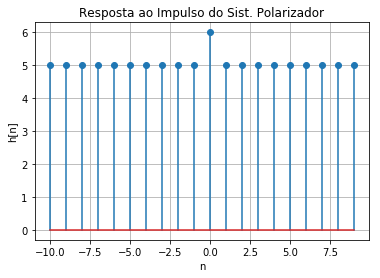

In [13]:
# Assumindo V0 = 5V
V0 = 5.
delta = impulso(n)
h = delta + V0
# gráfico
stem(n,h); title('Resposta ao Impulso do Sist. Polarizador'); grid(True); xlabel('n'); ylabel('h[n]');

Podemos verificar que o Potenciador é um sistema NÃO CAUSAL, pois sua Resposta ao Impulso Unitário, $h[n]$, possui amostras não nulas para tempos negativos...

Mas podemos transformar o sistema em questão num sistema causal, usando o sinal degrau unitário, da seguinte forma:

#### Polarizador Causal:  $y[n]=x[n]+V_0.u[n]$, onde $V_0$ é uma constante real

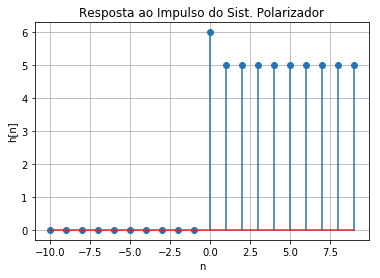

In [14]:
# Assumindo V0 = 5V
V0 = 5.
delta = impulso(n)
hc = delta + V0 * degrau(n)
# gráfico
stem(n,hc); title('Resposta ao Impulso do Sist. Polarizador'); grid(True); xlabel('n'); ylabel('h[n]');